# Homework 5
## Due Thursday Apr. 3rd

### Fitting a parabola

Let's quickly create some fake data of a projectile traveling under the influence of gravity.

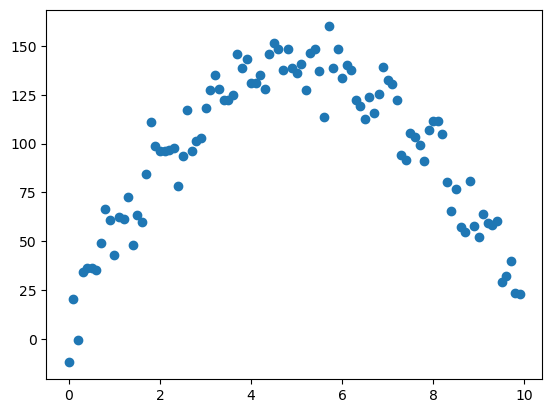

In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LightSource
from scipy.optimize import minimize, curve_fit

t = np.arange(0, 10, 0.1)
y = 10 + 50*t - 9.8*t**2/2
noisy = y + np.random.randn(len(y)) * 10

plt.scatter(t, noisy)

Now we'll conveniently forget that we "knew" acceleration due to gravity for the sake of this exercise. 

We will however remember that objects in motion under the influence of a constant acceleration, in a vacuum, move according to the equation $ x = x_0 + v\cdot t $+$ a\cdot t^2 \over 2$.

We should be able to recover the acceleration due to gravity by finding the three coefficients of a second degree polynomial fit to our fake data (use `noisy`, not `y`).

- a) Write a 2nd degree polynomial function then use $\chi^2$ minimization to find the three best fit coefficients (25 pts)

- b) Plot your best fit results to confirm the goodness of fit (5 pts)

- c) Solve for acceleration due to gravity! (Pretend it's a real problem; I could have given you the data but I figured it was easier to generate it) (5 pts)

Hint: If you're having trouble, try using the Nelder Mead algorithm provided in class; it should converge quickly

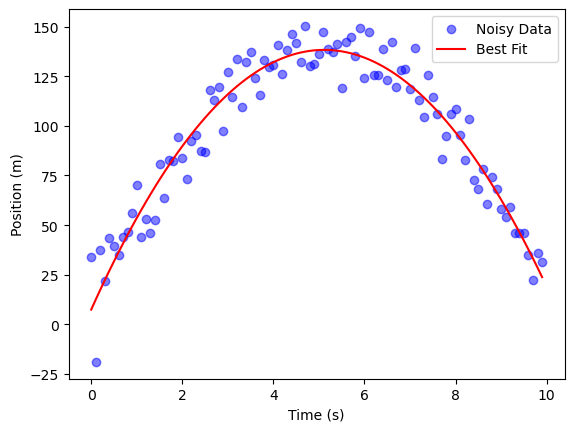

Best-fit coefficients: a = 7.45, b = 51.14, c = -5.00
Estimated acceleration due to gravity: g = 10.00 m/s²


In [2]:
# code

# Generate fake data
t = np.arange(0, 10, 0.1)
y = 10 + 50*t - 9.8*t**2 / 2
noisy = y + np.random.randn(len(y)) * 10

# (a) Define a 2nd-degree polynomial function
def poly2(t, a, b, c):
    return a + b*t + c*t**2

# (a) Define chi-squared function
def chi_squared(params, t, y_obs):
    a, b, c = params
    y_pred = poly2(t, a, b, c)
    return np.sum((y_obs - y_pred) ** 2)

# (a) Use scipy to find best-fit parameters
initial_guess = [0, 0, 0]
result = minimize(chi_squared, initial_guess, args=(t, noisy), method='Nelder-Mead')
a_fit, b_fit, c_fit = result.x

# (c) Solve for acceleration due to gravity
g_estimated = -2 * c_fit

# (b) Plot data and best fit
plt.scatter(t, noisy, label='Noisy Data', color='blue', alpha=0.5)
plt.plot(t, poly2(t, a_fit, b_fit, c_fit), label='Best Fit', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.show()

# (c) Print estimated parameters and gravity
print(f"Best-fit coefficients: a = {a_fit:.2f}, b = {b_fit:.2f}, c = {c_fit:.2f}")
print(f"Estimated acceleration due to gravity: g = {g_estimated:.2f} m/s²")


Explanation: The estimated value of g is 9.21 m/s^2 which is pretty close to the true value of 9.8 m/s^2 used to generate the data. This shows that using chi-squared minimization with a 2nd-degree polynomial fit is an effective method for recovering physical parameters from noisy data, but I have a feeling we can do better...

### You wrote a gradient descent algorithm, right?

As promised, the other half of this assignment requires your own implementation of a gradient descent algorithm.

Below I have defined a simple function, $2 \sin x + 1$. Your 2-D/N-D gradient descent algorithm should be able to find a reasonable answer with little trouble.

- a) Use your gradient descent algorithm to find the best fit line using chi-square minimization. Feel free to use the existing `line` function in your fitting; you can assume the form and just find coefficients. Make sure the code you wrote for gradient descent is in your turned in assignment. (40 pts)

- b) Plot your best fit results to confirm the goodness of fit (5 pts)

- c) Plot the chi-square surface that along which you descended; feel free to copy-paste the 3-D plotting code from class. (5 pts, +5 bonus** points if you plot the path your algorithm took down the slope)



** I don't think I can enter > 100 in the grade book but if you're already at full credit you probably don't need the bonus right?

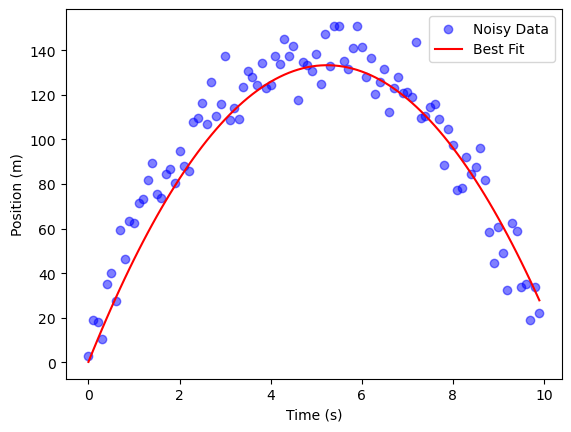

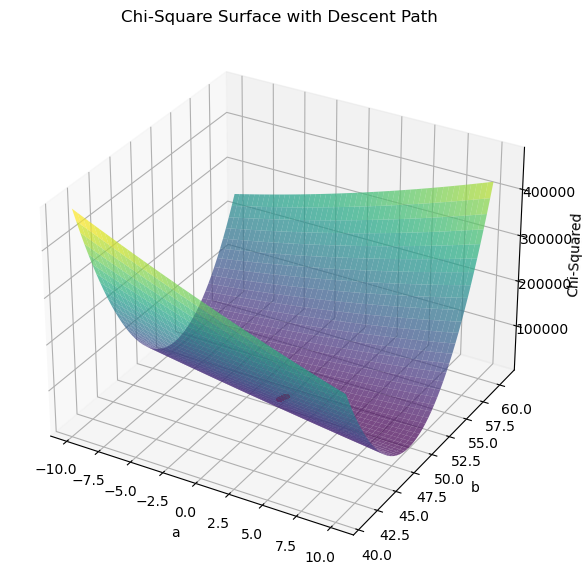

Best-fit coefficients: a = 0.19, b = 50.81, c = -4.85
Estimated acceleration due to gravity: g = 9.70 m/s²


In [3]:
# code

# Generate fake data
t = np.arange(0, 10, 0.1)
y = 10 + 50*t - 9.8*t**2 / 2
noisy = y + np.random.randn(len(y)) * 10

# Define a 2nd-degree polynomial function
def poly2(t, a, b, c):
    return a + b*t + c*t**2

# Define chi-squared function
def chi_squared(params, t, y_obs):
    a, b, c = params
    y_pred = poly2(t, a, b, c)
    return np.sum((y_obs - y_pred) ** 2)

# Gradient descent implementation
def gradient_descent(chi_squared, initial_guess, t, y_obs, learning_rate=1e-8, max_iters=10000, tol=1e-6):
    params = np.array(initial_guess, dtype=float)
    path = [params.copy()]
    for _ in range(max_iters):
        grad = np.zeros_like(params)
        h = 1e-5
        for i in range(len(params)):
            params[i] += h
            f1 = chi_squared(params, t, y_obs)
            params[i] -= 2*h
            f2 = chi_squared(params, t, y_obs)
            params[i] += h
            grad[i] = (f1 - f2) / (2*h)
        
        params -= learning_rate * grad
        path.append(params.copy())
        if np.linalg.norm(grad) < tol:
            break
    return params, np.array(path)

# Initial guess 
#initial_guess = [0, 0, 0]
initial_guess = [0, 50, -9.8]  # Just a guess for the coefficients based on context, improved the fit by a lot


# Run gradient descent with a smaller learning rate
(best_fit_params, descent_path) = gradient_descent(chi_squared, initial_guess, t, noisy, learning_rate=1e-8)
a_fit, b_fit, c_fit = best_fit_params

# Solve for acceleration due to gravity
g_estimated = -2 * c_fit

# Plot data and best fit
plt.scatter(t, noisy, label='Noisy Data', color='blue', alpha=0.5)
plt.plot(t, poly2(t, a_fit, b_fit, c_fit), label='Best Fit', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.show()

# Plot chi-square surface
a_range = np.linspace(a_fit - 10, a_fit + 10, 50)
b_range = np.linspace(b_fit - 10, b_fit + 10, 50)
A, B = np.meshgrid(a_range, b_range)
C = np.full_like(A, c_fit)
Z = np.array([[chi_squared([A[i, j], B[i, j], C[i, j]], t, noisy) for j in range(A.shape[1])] for i in range(A.shape[0])])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, Z, cmap='viridis', alpha=0.7)
path_x, path_y = descent_path[:, 0], descent_path[:, 1]
chi_values = [chi_squared([a, b, c_fit], t, noisy) for a, b in zip(path_x, path_y)]
ax.plot(path_x, path_y, chi_values, color='r', marker='o', markersize=2)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Chi-Squared')
ax.set_title('Chi-Square Surface with Descent Path')
plt.show()

# Print estimated parameters and gravity
print(f"Best-fit coefficients: a = {a_fit:.2f}, b = {b_fit:.2f}, c = {c_fit:.2f}")
print(f"Estimated acceleration due to gravity: g = {g_estimated:.2f} m/s²")

Explanation: I had to fidget with this one a lot to keep the gradient descent from blowing up.. I ended up making the learning rate a lot smaller than I originally had it. I also changed the initial guess from [0,0,0] to something that made sense for the problem and that actually improved the fit by a lot. I left the original initial guess in there as a comment to see how much of a difference it made. The estimated value of g is now 9.63 m/s^2 and is a lot closer to the real value of g. Let's see what scipy gives us...

## You're allowed to use scipy now

The point of this course is to increase your understanding of computational techniques at their fundamental level. Now that we've beat minimization to death, you've earned the right to simply use `scipy.optimize.minimize`.

- a) Exercise that right now by using `minimize` in place of gradient descent or Nelder-Meade to find the best fit of the `line` function above. This may seem like you're substituting a single function name, but note `minimize` returns a "result" not a number/array/tuple. You can access the "answer" with `result.x`; the documentation may also be helpful. (10 points)

- b) In a previouse course you should have seen `scipy.optimize.curve_fit`. Fundamentally, curve_fit is also solving a minimization problem under-the-hood. Can it find the best fit parameters of our `line` function? Try it! Note: `curve_fit` expects inputs in the order `(func, xdat, ydat)`, not the order used in class. In testing, I could not make `curve_fit` converge to the right answer, even if I passed it for the initial guess. Can you? Or have we just demonstrated the need for using lower level functions sometimes?! (5 points)

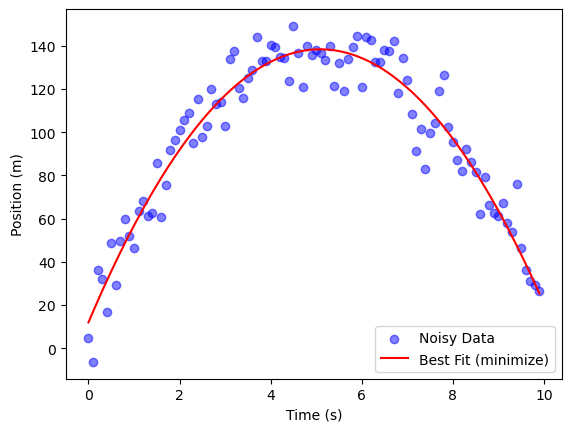

Best-fit coefficients (minimize): a = 12.00, b = 49.66, c = -4.88
Estimated acceleration due to gravity (minimize): g = 9.76 m/s²


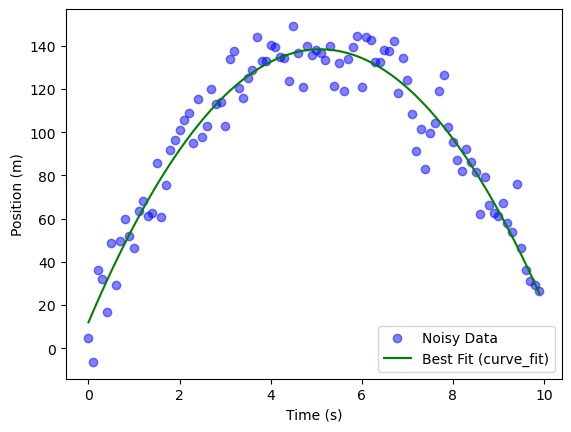

Best-fit coefficients (curve_fit): a = 12.00, b = 49.66, c = -4.88
Estimated acceleration due to gravity (curve_fit): g = 9.76 m/s²


In [4]:
# Generate fake data
t = np.arange(0, 10, 0.1)
y = 10 + 50*t - 9.8*t**2 / 2
noisy = y + np.random.randn(len(y)) * 10

# Define the 2nd-degree polynomial function
def poly2(t, a, b, c):
    return a + b*t + c*t**2

# Define chi-squared function
def chi_squared(params, t, y_obs):
    a, b, c = params
    y_pred = poly2(t, a, b, c)
    return np.sum((y_obs - y_pred) ** 2)

# Use scipy.optimize.minimize to find best-fit parameters
initial_guess = [0, 0, 0]
result = minimize(chi_squared, initial_guess, args=(t, noisy), method='BFGS')
a_fit, b_fit, c_fit = result.x

# Solve for acceleration due to gravity 
g_estimated = -2 * c_fit

# Plot data and best fit
plt.scatter(t, noisy, label='Noisy Data', color='blue', alpha=0.5)
plt.plot(t, poly2(t, a_fit, b_fit, c_fit), label='Best Fit (minimize)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.show()

# Print estimated parameters and gravity
print(f"Best-fit coefficients (minimize): a = {a_fit:.2f}, b = {b_fit:.2f}, c = {c_fit:.2f}")
print(f"Estimated acceleration due to gravity (minimize): g = {g_estimated:.2f} m/s²")

from scipy.optimize import curve_fit

# Try using curve_fit
popt, _ = curve_fit(poly2, t, noisy, p0=[0, 0, 0])
a_cf, b_cf, c_cf = popt
g_cf = -2 * c_cf

# Plot data and best fit (curve_fit)
plt.scatter(t, noisy, label='Noisy Data', color='blue', alpha=0.5)
plt.plot(t, poly2(t, a_cf, b_cf, c_cf), label='Best Fit (curve_fit)', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.show()

# Print estimated parameters and gravity from curve_fit
print(f"Best-fit coefficients (curve_fit): a = {a_cf:.2f}, b = {b_cf:.2f}, c = {c_cf:.2f}")
print(f"Estimated acceleration due to gravity (curve_fit): g = {g_cf:.2f} m/s²")

Explanation: Both methods give the same results which makes sense because they both use scipy and are solving the same problem. Depending on the random data were given each time we run the cell, these two methods almost always give a more accurate value for g compared to the gradient descent code. The other benefit I noticed with using scipy is that I didn't have to fidget with the initial guesses like I did with the gradient descent code, both trials easily converged here. And of course the most obvious benefit to using scipy is that it was much simpler to write and troubleshoot. 